## Лабораторная работа № 3
## Бабичева Анна М8О-304Б-17
## Вариант № 2

Импортирую необходимые библиотеки, включая собственную matrix с наработками 1 лабораторной работы.

In [1]:
import numpy as np
import pandas as pd
import math
import pylab
import matplotlib.pyplot as plt
import random
import matrix

from numpy import arange
from numpy import meshgrid
from matplotlib import mlab
from sys import stdin
from copy import deepcopy

# Часть 1
### 3.1. Используя таблицу значений $Y_i$  функции $y=f(x)$, вычисленных в точках  $X_i, i=0,...,3$  построить интерполяционные многочлены Лагранжа и Ньютона, проходящие через точки $X_i, Y_i$.  Вычислить значение погрешности интерполяции в точке $X^*$.

$y=sin(x)$

In [2]:
def f(x):
    return math.sin(x)

a) $X_i=0.1\pi, 0.2\pi, 0.3\pi, 0.4\pi$

б) $X_i=0.1\pi, \frac{\pi}{6}, 0.3\pi, 0.4\pi$

$X^*=\frac{\pi}{4}$

In [3]:
pi = math.pi

X_a = np.array([0.1 * pi, 0.2 * pi, 0.3 * pi, 0.4 * pi])
X_b = np.array([0.1 * pi, pi / 6, 0.3 * pi, 0.4 * pi])
X = pi / 4

Интерполяционный многочлен Лагранжа: 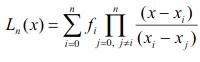

можно записать в виде: 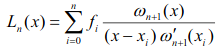

где $\omega_{n+1}(x)=\prod_{i=0}^n(x-x_i)$

In [4]:
def omega(x, X):
    w = 1
    for i in range(len(X)):
        w *= (x - X[i])
    return w

def omega_(x, X):
    w = 1
    for i in range(len(X)):
        if X[i] != x:
            w *= (x - X[i])
    return w

def L(x, X):
    l = 0
    for i in range(len(X)):
        l += (f(X[i]) * omega(x, X)) / ((x - X[i]) * omega_(X[i], X))
    return l

Разделенная разность нулевого порядка: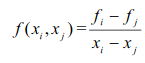

Разделенная разность $n-k+2$ порядка: 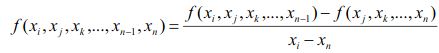

In [5]:
def X_new(i, k, X):
    return [X[j] for j in range(i, k)]

def separate(X):
    if len(X) == 2:
        return (f(X[0]) - f(X[1])) / (X[0] - X[1])
    else:
        return (separate(X_new(0, len(X) - 1, X)) - separate(X_new(1, len(X), X))) / (X[0] - X[len(X) - 1])

Интерполяционный многочлен Ньютона: 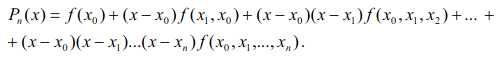

In [6]:
def xxx(x, i, X):
    res = 1
    for j in range(i):
        res *= (x - X[j])
    return res
    
def P(x, X):
    p = f(X[0])
    for i in range(1, len(X)):
        X_ = X_new(0, i + 1, X)
        p += xxx(x, i, X) * separate(X_)
    return p

Решение с помощью многочлена Лагранжа:

In [7]:
print("МНОГОЧЛЕН ЛАГРАНЖА\n")
print("а)\tf(x*) = {0}\n\tL(x*) = {1}\n\tПогрешность: {2}\n".format(f(X), L(X, X_a), f(X) - L(X, X_a)))
print("б)\tf(x*) = {0}\n\tL(x*) = {1}\n\tПогрешность: {2}\n".format(f(X), L(X, X_b), f(X) - L(X, X_b)))

МНОГОЧЛЕН ЛАГРАНЖА

а)	f(x*) = 0.7071067811865475
	L(x*) = 0.7069466693335428
	Погрешность: 0.00016011185300468522

б)	f(x*) = 0.7071067811865475
	L(x*) = 0.7068457655581606
	Погрешность: 0.00026101562838687364



Решение с помощью многочлена Ньютона:



In [8]:
print("МНОГОЧЛЕН НЬЮТОНА\n")
print("а)\tf(x*) = {0}\n\tP(x*) = {1}\n\tПогрешность: {2}\n".format(f(X), P(X, X_a), f(X) - P(X, X_a)))
print("б)\tf(x*) = {0}\n\tP(x*) = {1}\n\tПогрешность: {2}\n".format(f(X), P(X, X_b), f(X) - P(X, X_b)))

МНОГОЧЛЕН НЬЮТОНА

а)	f(x*) = 0.7071067811865475
	P(x*) = 0.7069466693335428
	Погрешность: 0.00016011185300468522

б)	f(x*) = 0.7071067811865475
	P(x*) = 0.7068457655581607
	Погрешность: 0.0002610156283867626



Как видно из построения многочленов и результатов вычисления, эти два многочлена равны, если привести подобные.

Построю истинный график функции и график построенных многочленов, проходящий через заданные точки:

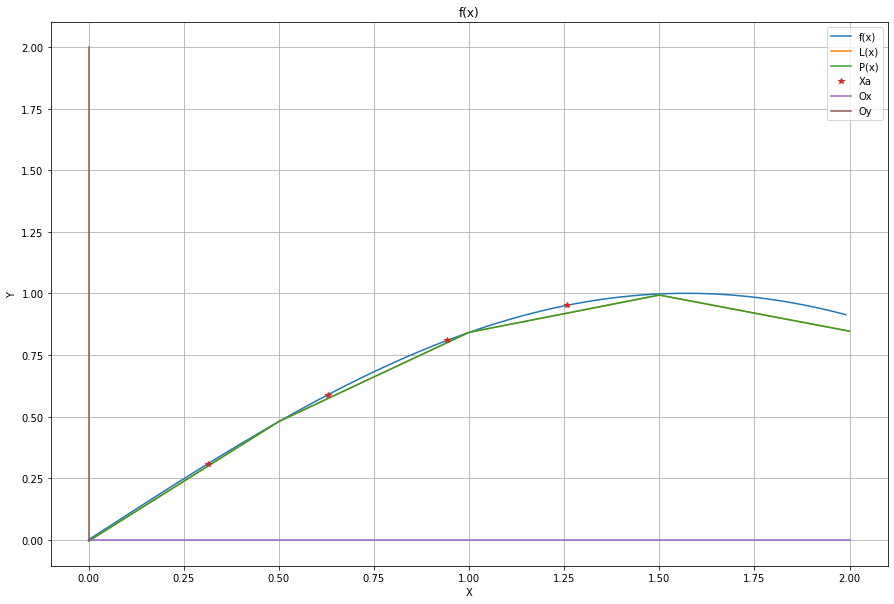

In [9]:
# ГРАФИК ФУНКЦИИ
xmin = 0
xmax = 2
dx = 0.01

xarr = np.arange(xmin, xmax, dx)
ylist = [f(x) for x in xarr]

y_X_a = [f(x) for x in X_a]

Larr = np.array([0, 0.5, 1, 1.5, 2])
Llist = [L(x, X_a) for x in Larr]

Parr = np.array([0, 0.5, 1, 1.5, 2])
Plist = [P(x, X_a) for x in Parr]

fig = plt.figure(figsize=(15, 10))
grid = plt.grid(True) 

plt.title('f(x)')
plt.plot(xarr, ylist)
plt.plot(Larr, Llist)
plt.plot(Parr, Plist)
plt.plot(X_a, y_X_a, '*')
plt.plot([0, 2], [0, 0])
plt.plot([0, 0], [0, 2])
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['f(x)', 'L(x)', 'P(x)', 'Xa', 'Ox', 'Oy'])
plt.show()

# Часть 2
### 3.2. Построить кубический сплайн для функции, заданной в узлах интерполяции, предполагая, что сплайн имеет нулевую кривизну при $x=x_0$ и $x=x_4$. Вычислить значение функции в точке $x=X^*$.

$X^*=1.5$

In [10]:
x = 1.5

$X_i=0; 1; 2; 3; 4$

$f_i=1; 0.86603; 0.5; 0; -0.5$

In [11]:
X = np.array([0., 1., 2., 3., 4.])
F = np.array([1., 0.86603, 0.5, 0., -0.5])

Кубический сплайн - кусочно-заданный интерполяционный многочлен третьей степени: 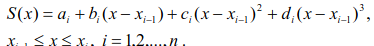

Для построения кубического сплайна необходимо построить n многочленов третьей степени, т. е. определить 4n неизвестных $a_i, b_i, c_i, d_i$. Для начала необходимо найти $c_i,i=2,...,n$ из системы с трехдиагональной матрицей: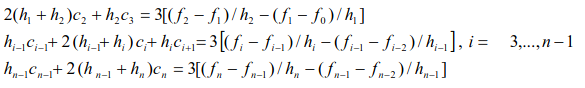

где $h_i=x_i-x_{i-1}$.

Данную систему следует решать методом прогонки.

In [12]:
def Progonka(A, b):
    if (A.size[0] != A.size[1]) | (A.size[0] != len(b)):
        raise Exception("Система имеет бесконечное число решений")   
    X = [0] * A.size[0]
    P = [0] * A.size[0]
    Q = [0] * A.size[0]
    P[0] = -A.matrix[0][1] / A.matrix[0][0]
    Q[0] = b[0] / A.matrix[0][0]
    for i in range(1, A.size[0]):
        if i != A.size[0] - 1:
            P[i] = -A.matrix[i][i + 1] / (A.matrix[i][i] + P[i - 1] * A.matrix[i][i - 1])
        else:
            P[i] = 0
        Q[i] = (b[i] - Q[i - 1] * A.matrix[i][i - 1]) / (A.matrix[i][i] + P[i - 1] * A.matrix[i][i - 1])
    for i in range(A.size[0] - 1, -1, -1):
        if i != A.size[0] - 1:
            X[i] = X[i + 1] * P[i] + Q[i]
        else:
            X[i] = Q[i]
    return X

Остальные коэффициенты ищутся по формулам: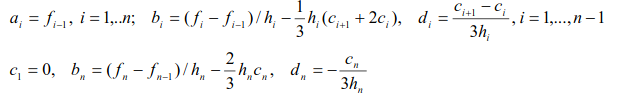

In [13]:
def S(x, X, F):
    if len(X) != len(F):
        raise Exception("Несовпадение размерностей")
        
    h = []
    n = len(X)
    
    for i in range(1, n):
        h.append(X[i] - X[i - 1])
        
    c_syst = []
    rows = []
    
    for i in range(n - 2):
        if i == 0:
            rows.append(2 * (h[i] + h[i + 1]))
        elif i == 1:
            rows.append(h[i])
        else:
            rows.append(0)
            
    c_syst.append(rows)
        
    for i in range(1, n - 3):
        rows = []
        for j in range(n - 2):
            if i - 1 == j:
                rows.append(h[i])
            elif i == j:
                rows.append(2 * (h[i - 1] + h[i]))
            elif i + 1 == j:
                rows.append(h[i])
            else:
                rows.append(0)
        c_syst.append(rows)
    
    rows = []
    
    for i in range(2, n):
        if i == n - 2:
            rows.append(h[i])
        elif i == n - 1:
            rows.append(2 * (h[i - 2] + h[i - 1]))
        else:
            rows.append(0)
            
    c_syst.append(rows)        
    b = []    
    
    for i in range(2, n):
        b.append(3 * ((F[i] - F[i - 1]) / h[i - 1] - (F[i - 1] - F[i - 2]) / h[i - 2]))
    
    c = [0] + Progonka(matrix.Matrix(c_syst), b)
    
    a = []
    b = []
    d = []
    
    for i in range(n - 1):
        a.append(F[i])
        if i == n - 2:
            b.append((F[i + 1] - F[i]) / h[i] - (2 / 3) * h[i] * c[i])
            d.append(- c[i] / (3 * h[i]))
        else:
            b.append((F[i + 1] - F[i]) / h[i] - (1 / 3) * h[i] * (c[i + 1] + 2 * c[i]))
            d.append((c[i + 1] - c[i]) / (3 * h[i]))
    
    for i in range(n - 1):
        if (x >= X[i]) & (x <= X[i + 1]):
            res = a[i] + b[i] * (x - X[i]) + c[i] * (x - X[i]) ** 2 + d[i] * (x - X[i]) ** 3
            break
    return res

Ответ в точке $X^*$:

In [14]:
print('f(x*) = {}'.format(S(x, X, F)))

f(x*) = 0.7108741517857143


График полученного кубического сплайна и искомые точки:

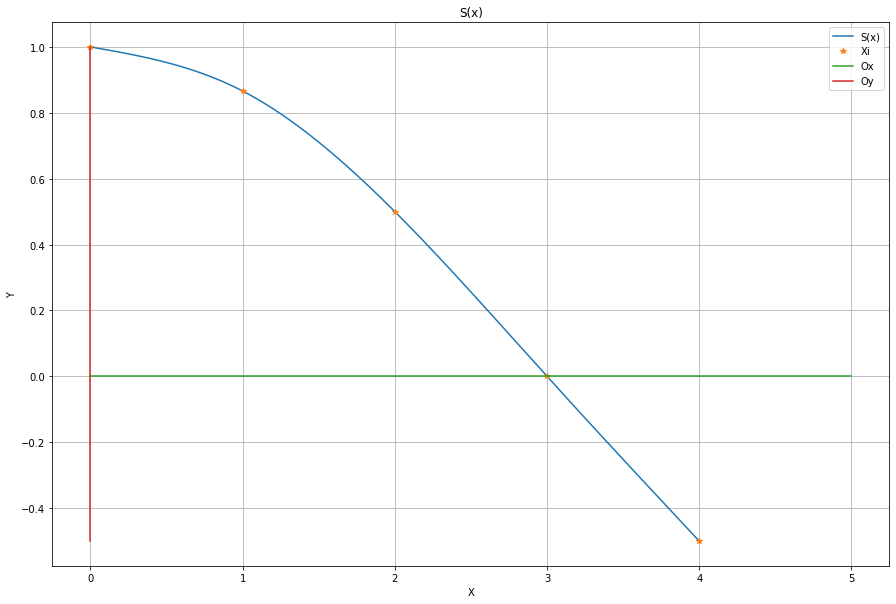

In [15]:
# ГРАФИК ФУНКЦИИ
xmin = 0
xmax = 4
dx = 0.01

xarr = np.arange(xmin, xmax, dx)
ylist = [S(x_, X, F) for x_ in xarr]


fig = plt.figure(figsize=(15, 10))
grid = plt.grid(True) 

plt.title('S(x)')
plt.plot(xarr, ylist)
plt.plot(X, F, '*')
plt.plot([0, 5], [0, 0])
plt.plot([0, 0], [-0.5, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['S(x)', 'Xi', 'Ox', 'Oy'])
plt.show()

# Часть 3
### 3.3. Для таблично заданной функции путем решения нормальной системы МНК найти приближающие многочлены a) 1-ой  и б) 2-ой степени. Для каждого из приближающих многочленов вычислить сумму квадратов ошибок. Построить графики приближаемой функции и приближающих многочленов.

$X_i=-1; 0; 1; 2; 3; 4$

$Y_i=0.86603; 1; 0.86603; 0.5; 0; -0.5$

In [16]:
X = np.array([-1, 0, 1, 2, 3, 4])
Y = np.array([0.86603, 1, 0.86603, 0.5, 0, -0.5])

Искомые точки:

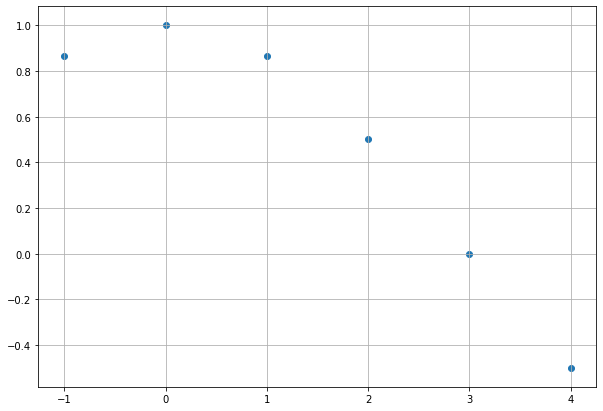

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(X, Y)
plt.grid()
plt.show()

МНК позволяет построить многочлен степени n вида: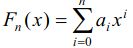

Коэффициенты $a_i$ находятся решением системы: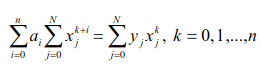

Данную систему можно решить с помощью метода Гаусса с LU-разложением.

In [18]:
def MNK(X, Y, n):
    if len(X) != len(Y):
        raise Exception("Несоответсвие размерностей")
    A = []
    b = []
    
    for i in range(n + 1):
        rows = []
        for j in range(n + 1):
            rows.append(sum([x ** (i + j) for x in X]))
        A.append(rows)
        b.append(sum([Y[k] * X[k] ** i for k in range(len(Y))]))
    
    a = matrix.Gauss_LU(matrix.Matrix(A, LU=True), b)
    return lambda x: sum([a[i] * x ** i for i in range(n + 1)])

Характеристикой точности построенного многочлена будет значение средне-квадратичного отклонения: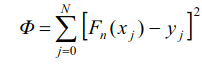

In [19]:
def err(f, X, Y):
    if len(X) != len(Y):
        raise Exception("Несоответсвие размерностей")
    return sum([(f(X[i]) - Y[i]) ** 2 for i in range(len(X))])

Строю многочлены 1 и 2 степени:

In [20]:
f_1 = MNK(X, Y, 1)
f_2 = MNK(X, Y, 2)

Определяю границы графика функций и множество точек:

In [21]:
xmin = -1
xmax = 4
dx = 0.01

xarr = np.arange(xmin, xmax, dx)

График многочлена 1 степени и его средне-квадратичное отклонение:

Standard deviation of f_1(x) is 0.27081794892761896


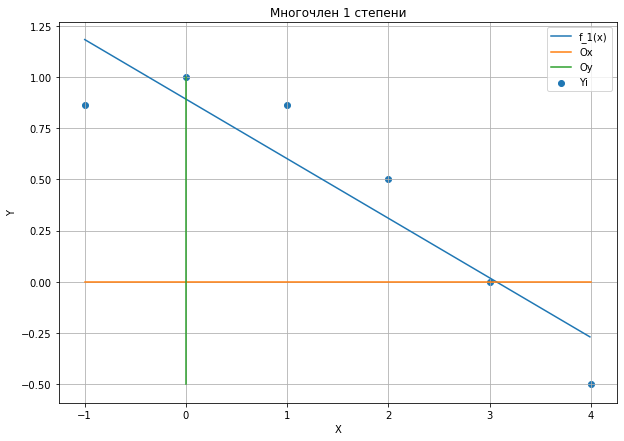

In [22]:
print("Standard deviation of f_1(x) is {}".format(err(f_1, X, Y)))

ylist = [f_1(x) for x in xarr]

plt.figure(figsize=(10,7))
plt.title("Многочлен 1 степени")
plt.grid()
plt.scatter(X, Y)
plt.plot(xarr, ylist)
plt.plot([-1, 4], [0, 0])
plt.plot([0, 0], [-0.5, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['f_1(x)', 'Ox', 'Oy', 'Yi'])
plt.show()

График многочлена 2 степени и его средне-квадратичное отклонение:

Standard deviation of f_2(x) is 0.01517892558357143


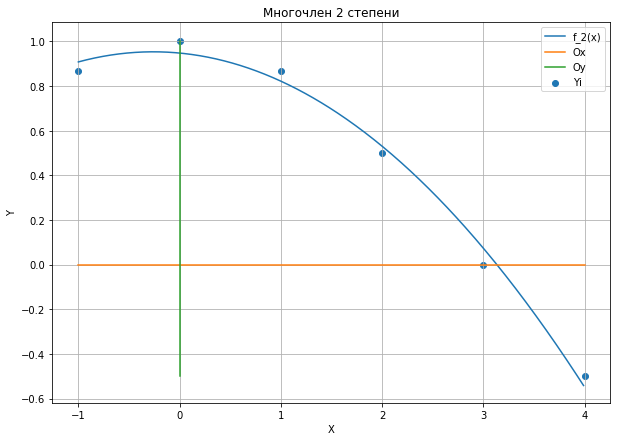

In [23]:
print("Standard deviation of f_2(x) is {}".format(err(f_2, X, Y)))

ylist = [f_2(x) for x in xarr]

plt.figure(figsize=(10,7))
plt.title("Многочлен 2 степени")
plt.grid()
plt.scatter(X, Y)
plt.plot(xarr, ylist)
plt.plot([-1, 4], [0, 0])
plt.plot([0, 0], [-0.5, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['f_2(x)', 'Ox', 'Oy', 'Yi'])
plt.show()

# Часть 4
### 3.4. Вычислить первую и вторую производную от таблично заданной функции $y_i=f(x_i)$ в точке $x=X^*$.  

$X^*=1$

In [24]:
x = 1.

$X_i=-1; 0; 1; 2; 3$

$Y_i=-0.5; 0; 0.5; 0.86603; 1$

In [25]:
X = np.array([-1., 0., 1., 2., 3.])
Y = np.array([-0.5, 0., 0.5, 0.86603, 1])

Заданные точки:

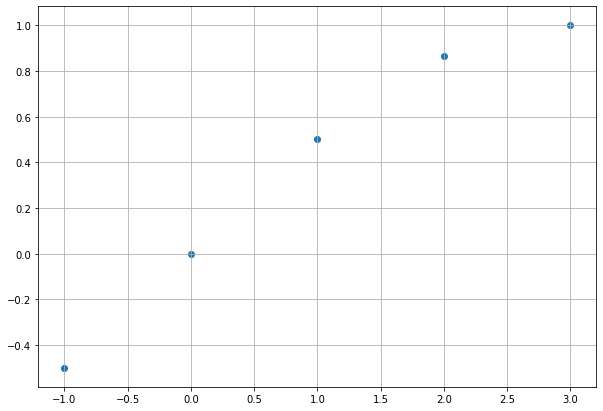

In [26]:
plt.figure(figsize=(10,7))
plt.scatter(X, Y)
plt.grid()
plt.show()

Таблично-заданные функции могут быть аппроксимированы отрезками прямой или интерполяционным многочленом второй степени. В случае аппроксимации отрезками прямой имеем: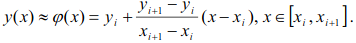

Тогда первая производная имеет вид: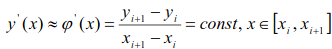

В таком случае производная рассчитывается с первым порядком точности в крайних точках интервала и со вторым порядком точности в средних точках интервала.

При аппроксимации интерполяционным многочленом второй степени имеем: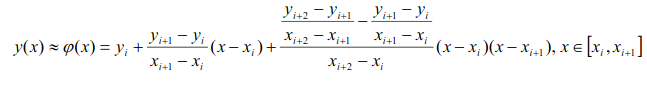

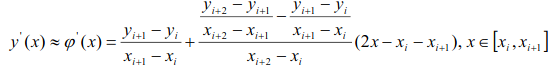

Данная формула обеспечивает второй порядок точности. Также мы можем вычислить вторую производную: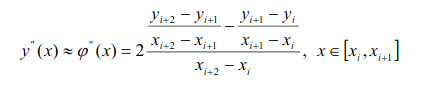

In [27]:
def diff(x, X, Y):
    if len(X) != len(Y):
        raise Exception("Несоответсвие размерностей")
    
    for i in range(len(X) - 1):
        if (x >= X[i]) & (x <= X[i + 1]):
            if (x == X[i]) & (i != 0):
                left = (Y[i] - Y[i - 1]) / (X[i] - X[i - 1])
                right = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i])
                
                mean = (left + right) / 2
                
                print('Левая производная: {}'.format(left))
                print('Правая производная: {}'.format(right))
                print('Среднее: {}'.format(mean))
                
            elif (x == X[i + 1]) & (i != len(X) - 1):
                left = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i])
                right = (Y[i + 2] - Y[i + 1]) / (X[i + 2] - X[i + 1])
                
                mean = (left + right) / 2
                
                print('Левая производная: {}'.format(left))
                print('Правая производная: {}'.format(right))
                print('Среднее: {}'.format(mean))
            else:
                df_1 = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i])
                
                print('1-я производная от функции первой степени: {}'.format(df_1))
            df_2 = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) + (((Y[i + 2] - Y[i + 1]) / (X[i + 2] - X[i + 1]) - (Y[i + 1] - Y[i]) / (X[i + 1] - X[i])) / (X[i + 2] - X[i])) * (2 * x - X[i] - X[i + 1])
            ddf = 2 * (((Y[i + 2] - Y[i + 1]) / (X[i + 2] - X[i + 1]) - (Y[i + 1] - Y[i]) / (X[i + 1] - X[i])) / (X[i + 2] - X[i]))
            
            print('1-я производная от функции второй степени степени: {}'.format(df_2))
            print('2-я производная от функции второй степени степени: {}'.format(ddf))
            break

Вычисление производных в точке:

In [28]:
diff(x, X, Y)

Левая производная: 0.5
Правая производная: 0.36602999999999997
Среднее: 0.433015
1-я производная от функции второй степени степени: 0.433015
2-я производная от функции второй степени степени: -0.13397000000000003


# Часть 5
### 3.5. Вычислить определенный интеграл  $F=\int_{x_0}^{x_1}ydx$, методами прямоугольников, трапеций, Симпсона с шагами $h_1, h_2$. Оценить погрешность вычислений, используя  Метод Рунге-Ромберга: 

$y=\frac{x}{(3x+4)^2}$

In [29]:
def y(x):
    return x / ((3 * x + 4) ** 2)

$X_0=0; X_k=4; h_1=1; h_2=0.5$

In [30]:
x0 = 0
x1 = 4
h1 = 1.
h2 = 0.5

Формула прямоугольников: 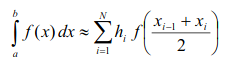

In [31]:
def rectangle(x0, x1, f, h):
    X = np.arange(x0, x1, h)
    return h * sum([f(X[i] + h / 2) for i in range(len(X))])

Формула трапеций: 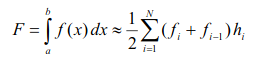

In [32]:
def trapeze(x0, x1, f, h):
    X = np.arange(x0, x1, h)
    return h * ((f(X[0]) + f(x1)) / 2 + sum([f(X[i]) for i in range(1, len(X))]))

Формула Симпсона: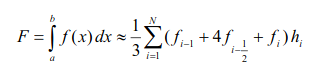

In [33]:
def Simpson(x0, x1, f, h):
    res = 0
    x = x0 + h
    while x < x1:
        res += f(x - h) + 4 * f(x) + f(x + h)
        x += 2 * h
    return (h / 3) * res

Метод Рунге-Ромберга-Ричардсона: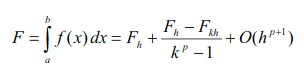

Буду использовать метод 2 порядка.

In [34]:
p = 2
def RRR(F1, F2, h1, h2, p):
    if h1 < h2:
        return F1 + (F1 - F2) / ((h2 / h1) ** p - 1)
    return F2 + (F2 - F1) / ((h1 / h2) ** p - 1)

Нахожу значения всеми 4-мя методами:

In [35]:
p1 = rectangle(x0, x1, y, h1)
t1 = trapeze(x0, x1, y, h1)
s1 = Simpson(x0, x1, y, h1)

p2 = rectangle(x0, x1, y, h2)
t2 = trapeze(x0, x1, y, h2)
s2 = Simpson(x0, x1, y, h2)

rp = RRR(p1, p2, h1, h2, p)
rt = RRR(t1, t2, h1, h2, p)
rs = RRR(s1, s2, h1, h2, p)

In [36]:
print('h1 = {}'.format(h1))
print("Прямоугольник: {}".format(p1))
print("Трапеция: {}".format(t1))
print("Симпсон: {}".format(s1))

h1 = 1.0
Прямоугольник: 0.07284061196629331
Трапеция: 0.06597214255524694
Симпсон: 0.0694211900736626


In [37]:
print('h2 = {}'.format(h2))
print("Прямоугольник: {}".format(p2))
print("Трапеция: {}".format(t2))
print("Симпсон: {}".format(s2))

h2 = 0.5
Прямоугольник: 0.0713276669809035
Трапеция: 0.06940637726077012
Симпсон: 0.07055112216261118


In [38]:
print('\nТочное значение по Рунге-Ромбергу-Ридчардсону для прямоугольника: {0};\nПогрешность: {1} и {2}'.format(rp, abs(rp - p1), abs(rp - p2)))
print('\nТочное значение по Рунге-Ромбергу-Ридчардсону для трапеции: {0};\nПогрешность: {1} и {2}'.format(rt, abs(rt - t1), abs(rt - t2)))
print('\nТочное значение по Рунге-Ромбергу-Ридчардсону для Симпсона: {0};\nПогрешность: {1} и {2}'.format(rp, abs(rs - s1), abs(rs - s2)))


Точное значение по Рунге-Ромбергу-Ридчардсону для прямоугольника: 0.07082335198577355;
Погрешность: 0.002017259980519756 и 0.0005043149951299425

Точное значение по Рунге-Ромбергу-Ридчардсону для трапеции: 0.07055112216261118;
Погрешность: 0.004578979607364239 и 0.0011447449018410633

Точное значение по Рунге-Ромбергу-Ридчардсону для Симпсона: 0.07082335198577355;
Погрешность: 0.001506576118598113 и 0.00037664402964952826
